<hr>
<center><h1>Example Course 2018 - Assginment 1</h1></center>
<hr>

This assignment is a short test of a couple of aspects we discussed in the exercise so far.

Fill in your name (and of your fellow students, if you submit together), and according matriculation number below. If you are more than one student, separate by a comma **,**

<br>
<div class="alert alert-warning">
**Note**: This notebook is a graded assignment. You can work on this assignment alone or together in a group of two. 
<br>
<br>
If you choose to work in a group of two, then **make sure you keep the group in this form until the end of the semester**!
</div>

<div class="alert alert-warning">
<br>
Please upload your completed notebook to Moodle **strictly following** the naming convention:
<ul>
<li>``assignment1_XXXXXX.ipynb`` where XXXXXX corresponds to your student ID, or:
<li>``assignment1_XXXXXX_YYYYYY.ipynb`` if you submit together (both student ID's)
</ul>
</div>

Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

<br>
<div class="alert-danger">
<br><center>Remember: copying code form someone else and pretending it is your own is **serious scientific fraud**!</center>
<br>
</div>

# Bullard Plot 
<img src='bullard_layer.png' style="float: right; width: 27%; margin-right: 3%; margin-bottom: 0.5em;">
The Bullard plot method is used for calculating the specific heat flow in an area based on temperature data and the concept of *thermal resistance*. Let's assume we have a layercake model with discrete layers of rocks. The thermal resistance can be written as:  

$$ R = \sum_i \bigg(\frac{\Delta z_i}{\lambda_i}\bigg) $$  

where $i$ is the number of layers in the sequence and $\Delta z$ the according layer-thickness.  

The idea of the Bullard-Plot is to plot the cumulative thermal resistances vs measured temperatures. They exhibit a linear relation. Using a linear regression, the obtained slope is equal to the specific heat flow.

Assume we have a borehole with a depth of 2.2 km. It penetrates multiple layers. The average surface temperature is 11 °C. At each layer boundary, temperatures were measured, as well as at the maximum depth of the borehole.  
So in total, we have 4 temperature measurements:  
* 22 °C @ 1 km depth  
* 30 °C @ 1.4 km depth  
* 44 °C @ 2 km depth  
* 47 °C @ 2.2 km depth  


Thermal resistance (R in [m² K W$^{-1}$) is the integrated reciprocal of thermal conductivities over a depth range z, i.e. how effectively a layered sequence of rocks retards the flow of heat.  

$$ R = \int \frac{1}{\lambda} dz $$  

From Fouriers Law, we know:  
$$q = \lambda \bigg(\frac{\partial T}{\partial z}\bigg) $$

rearragning the equation yields:
$$q = \partial T \bigg(\frac{\lambda}{\partial z}\bigg) $$

this fraction is equal to 1/R:
$$q = \partial T \bigg(\frac{1}{\partial R}\bigg) $$

which then yields to:
$$q = \bigg(\frac{\partial T}{\partial R}\bigg) $$  

That means, the change in temperature with respect to the thermal resistance is equal to the specific heat flow.  
Now let's assume we have a layercake model with discrete layers of rocks. The thermal resistance can then be rewritten as:  

$$ R = \sum_i \bigg(\frac{\Delta z_i}{\lambda_i}\bigg) $$  

where $i$ is the number of layers in the sequence and $\Delta z$ the according layer-thickness.  

The idea of the Bullard-Plot is to plot the cumulative thermal resistances vs measured temperatures. They exhibit a linear relation. Using a linear regression, the obtained slope is equal to the specific heat flow.

In [2]:
# import libraries. You don't need more than these
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up arrays
z = np.array([1000, 400, 600, 200])
tc = np.array([3.2, 2.3, 1.6, 4.2])

T = np.array([22, 30, 44, 47]) # here we also include the surface temperature


## Exercise 1  
Calculate the single thermal resistances for each layer and the total thermal resistance of the whole layer series using the information given above. Write this as a general function for two arrays of variable length and not just for the values given in this exercise.  
Round the returning R-array to the third decimal place using `np.round(r, 3)`

In [5]:
def calc_res(z, tc):
    """
    input:  z - array of thickness values of rock formations
            tc - array of corresponding thermal conductivities
    return:
            r - array with the thermal resistances
    """
    r = [z[0]/tc[0]]
    for i in range(1,len(z)):
        r_temp = z[i] / tc[i]
        r.append(r[i-1] + r_temp)

    
    return np.round(np.array(r), 3)

In [6]:
"Check the function"
from numpy.testing import assert_equal
assert_equal(calc_res(np.linspace(20, 80, 4), np.array([2, 4, 6, 1])),
            [10., 20., 30., 110.])
assert_equal(calc_res(np.linspace(100, 500, 5),
                     np.array([2.1, 2.5, 1.2, 5.2, 3.])),[47.619, 127.619, 377.619, 454.542, 621.209],
            err_msg='Wrong solution.', verbose=False)

## Exercise 2  
The Bullard plot can be used for assessing the average specific heat flow over a sequence of rocks. Substituting the thermal resistance for thermal conductivity in Fourier's law of heat conduction and re-arranging it yields:

$$q  = \bigg(\frac{\partial T}{\partial R}\bigg) $$  

So the specific heat flow is the difference quotient of the two variables temperature ($T$) and thermal resistance ($R$). Your task is to plot the thermal resistances (x-axis) against temperature (y-axis) and do a linear regression for estimating the slope, i.e. the average specific heat flow.  

Remember, you can use numpy's method `polyfit()` for the regression.   

<hr>

<center>
<div class="alert alert-warning">
Remember to label axes, include a legend, and choose a font big enough for the plot.
</div>
</center>

Text(0,0.5,'temperature [°C]')

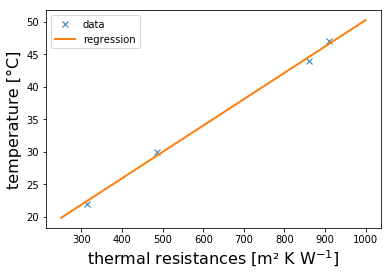

In [10]:
# here is the regression code
resis = calc_res(z, tc)
regr = np.polyfit(resis, T, 1)
slope = regr[0]
y_inter = regr[1]


reg_res = np.linspace(250, 1000, 50)
reg_tem = slope * reg_res + y_inter


# here is the plot code
plt.plot(resis, T, 'x', label='data')
plt.plot(reg_res, reg_tem, label='regression', linewidth=2)
plt.legend()

plt.xlabel('thermal resistances [m² K W$^{-1}$]', fontsize=16)
plt.ylabel('temperature [°C]', fontsize=16)




What is the average specific heat flow over the sediment column? _(Round to three decimals)_ 

In [11]:
print("The average specific heat flow is %s " % np.round(slope, 3))

The average specific heat flow is 0.041 
